In [6]:
import math
import numpy as np 
import pylab as pl
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy import fftpack  
import scipy.signal as signal
from scipy import interpolate


#判定当前的时间序列是否是单调序列
def ismonotonic(x):
    max_peaks=signal.argrelextrema(x,np.greater)[0]
    min_peaks=signal.argrelextrema(x,np.less)[0]
    all_num=len(max_peaks)+len(min_peaks)
    if all_num>0:
        return False
    else:
        return True
        
#寻找当前时间序列的极值点
def findpeaks(x):
    return signal.argrelextrema(x,np.greater)[0]
#判断当前的序列是否为 IMF 序列
def isImf(x):
    N=np.size(x)
    pass_zero=np.sum(x[0:N-2]*x[1:N-1]<0)#过零点的个数
    peaks_num=np.size(findpeaks(x))+np.size(findpeaks(-x))#极值点的个数
    if abs(pass_zero-peaks_num)>1:
        return False
    else:
        return True
#获取当前样条曲线
def getspline(x):
    N=np.size(x)
    peaks=findpeaks(x)
    print('当前极值点个数：',len(peaks))
    if(len(peaks)<=3):
        if(len(peaks)<2):
            peaks=np.concatenate(([0],peaks))
            peaks=np.concatenate((peaks,[N-1]))#这里是为了防止样条次数不够，无法插值的情况
        t=interpolate.splrep(peaks,y=x[peaks], w=None, xb=None, xe=None,k=len(peaks)-1)
        return interpolate.splev(np.arange(N),t)
    t=interpolate.splrep(peaks,y=x[peaks])
    return interpolate.splev(np.arange(N),t)
#     f=interp1d(np.concatenate(([0,1],peaks,[N+1])),np.concatenate(([0,1],x[peaks],[0])),kind='cubic')
#     f=interp1d(peaks,x[peaks],kind='cubic')
#     return f(np.linspace(1,N,N))
    
    
#经验模态分解方法
def emd(x):
    imf=[]
    while not ismonotonic(x):
        x1=x
        sd=np.inf
        while sd>0.1 or  (not isImf(x1)):
            print (isImf(x1))
            s1=getspline(x1)
            s2=-getspline(-1*x1)
            x2=x1-(s1+s2)/2
            sd=np.sum((x1-x2)**2)/np.sum(x1**2)
            x1=x2
        
        imf.append(x1)
        x=x-x1
    imf.append(x)
    return imf
    

No handles with labels found to put in legend.


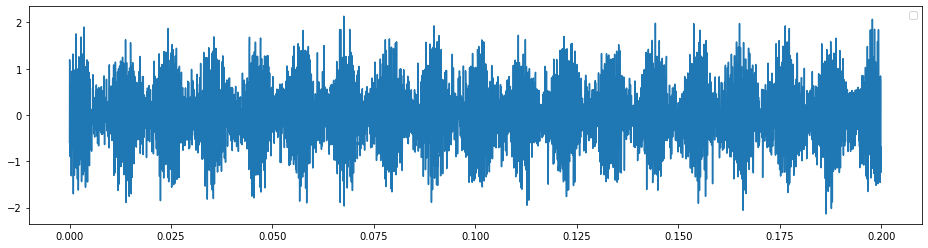

In [7]:
def wgn(x, snr):
    snr = 10**(snr/10.0)
    xpower = np.sum(x**2)/len(x)
    npower = xpower / snr
    return np.random.randn(len(x)) * np.sqrt(npower)

sampling_rate=30000
f0=92
fg=4000
fft_size = 512
t=np.arange(0, 0.2, 1.0/sampling_rate)
x1=0.6*(1+np.sin(2*np.pi*f0*t))*np.sin(2*np.pi*fg*t)
x1+=wgn(x1, 3)
plt.figure(figsize=(16,4))
plt.plot(t,x1)
plt.legend()
plt.show()


In [8]:
imf1=emd(x1)
imf1

False
当前极值点个数： 1538
当前极值点个数： 1537
False
当前极值点个数： 1615
当前极值点个数： 1615
False
当前极值点个数： 1652
当前极值点个数： 1651
False
当前极值点个数： 1682
当前极值点个数： 1681
False
当前极值点个数： 1702
当前极值点个数： 1701
False
当前极值点个数： 1716
当前极值点个数： 1715
False
当前极值点个数： 1733
当前极值点个数： 1732
False
当前极值点个数： 1741
当前极值点个数： 1740
False
当前极值点个数： 1754
当前极值点个数： 1753
False
当前极值点个数： 1765
当前极值点个数： 1764
False
当前极值点个数： 1774
当前极值点个数： 1773
False
当前极值点个数： 1785
当前极值点个数： 1784
False
当前极值点个数： 1791
当前极值点个数： 1790
False
当前极值点个数： 1792
当前极值点个数： 1791
False
当前极值点个数： 1800
当前极值点个数： 1799
False
当前极值点个数： 1809
当前极值点个数： 1808
False
当前极值点个数： 1811
当前极值点个数： 1810
False
当前极值点个数： 1817
当前极值点个数： 1816
False
当前极值点个数： 1819
当前极值点个数： 1818
False
当前极值点个数： 1822
当前极值点个数： 1821
False
当前极值点个数： 1828
当前极值点个数： 1827
False
当前极值点个数： 1833
当前极值点个数： 1832
False
当前极值点个数： 1836
当前极值点个数： 1835
False
当前极值点个数： 1840
当前极值点个数： 1839
False
当前极值点个数： 1842
当前极值点个数： 1841
False
当前极值点个数： 1847
当前极值点个数： 1846
False
当前极值点个数： 1849
当前极值点个数： 1848
False
当前极值点个数： 1852
当前极值点个数： 1851
False
当前极值点个数： 1854
当前极值点个数： 1853
False
当前极值点个数：

[array([-22.2222611 , -12.01594801,  -6.23910999, ..., -18.51136308,
        -25.44307566, -34.53359155]),
 array([20.01674686, 11.95248069,  6.16322871, ..., 26.17347104,
        35.59883227, 46.8720584 ]),
 array([-13.67174053, -13.44795255, -13.18980468, ..., -10.9920105 ,
        -13.08164611, -15.41689649]),
 array([14.46826106, 13.91163524, 13.36739737, ...,  7.22871243,
         7.58559987,  7.95282874]),
 array([ 0.91607457,  0.88982186,  0.86413903, ..., -6.12686716,
        -6.36384353, -6.60654022]),
 array([4.32804279, 4.31222805, 4.29645313, ..., 1.77294845, 1.80052544,
        1.82839461]),
 array([-4.29551215, -4.28035438, -4.26522231, ..., -1.46409137,
        -1.47400727, -1.48397142]),
 array([ 0.29701454,  0.29690283,  0.29678955, ..., -0.28214738,
        -0.2811691 , -0.2801859 ]),
 array([-0.48671645, -0.48560289, -0.48449085, ...,  0.90578079,
         0.90768303,  0.90958773]),
 array([ 0.00000000e+00, -2.18656459e-05, -4.37240008e-05, ...,
        -4.37240008e-

In [9]:
len(imf1)

21

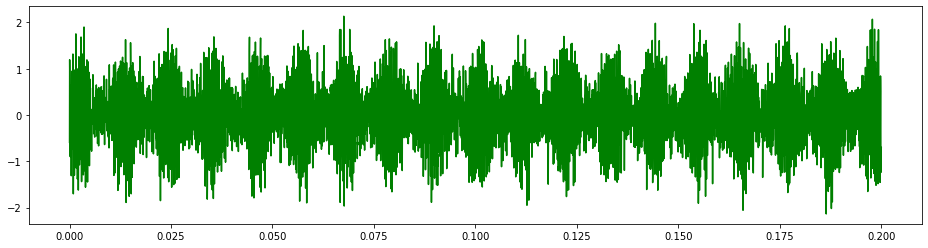

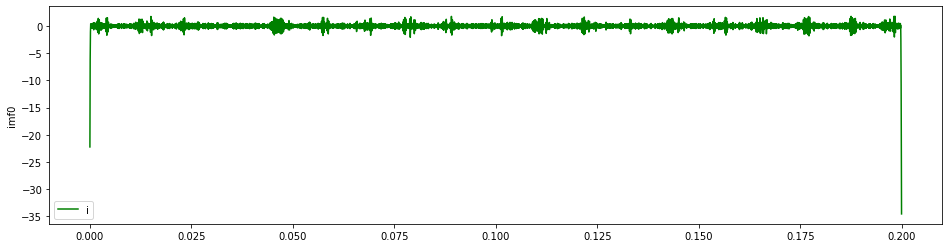

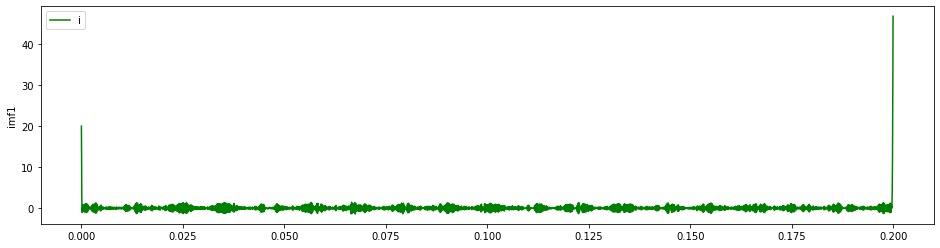

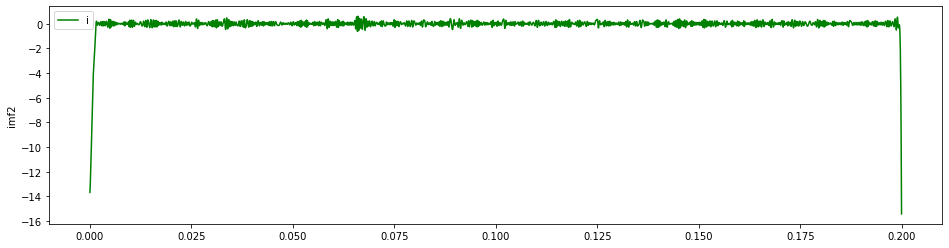

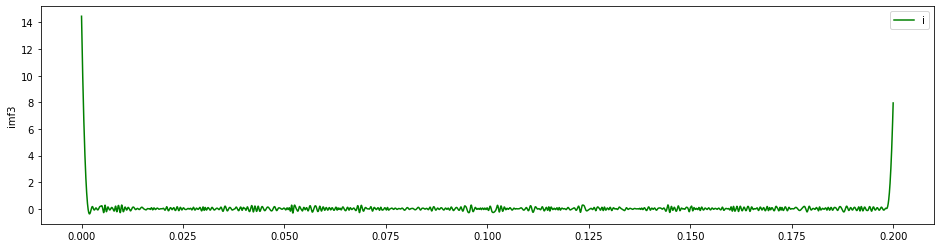

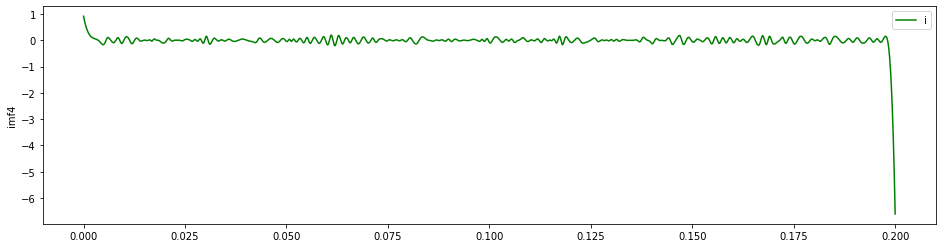

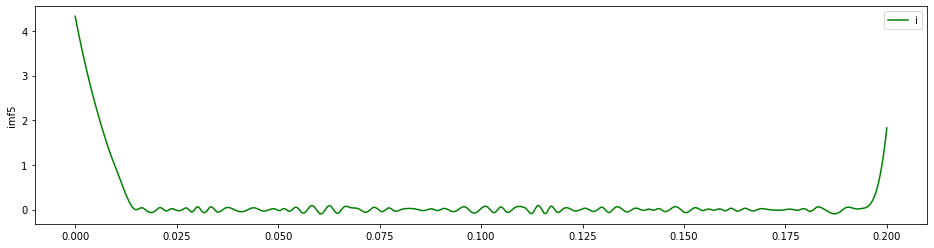

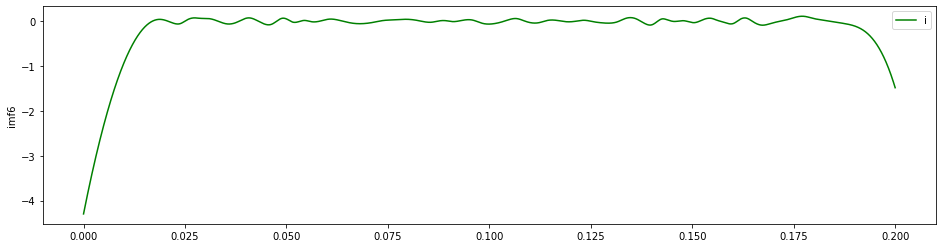

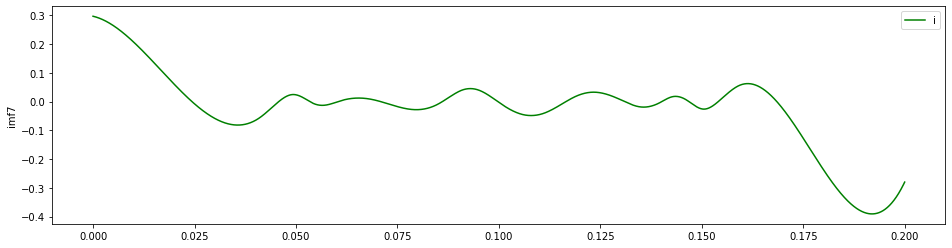

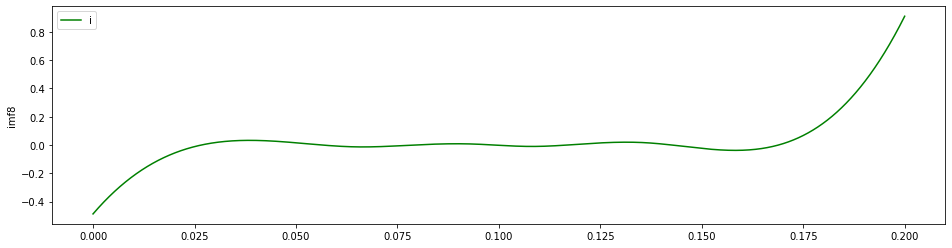

<Figure size 432x288 with 0 Axes>

In [10]:
plt.figure(figsize=(16,4))
plt.plot(t,x1,'g')
for i in range(9):
    plt.figure(figsize=(16,4))
    #plt.subplot(12,1,1)
    plt.plot(t,imf1[i],'g')
    plt.ylabel('imf%d'%(i))
    plt.legend('imf%d'%(i))
    plt.show()
plt.savefig('000.png')